<a href="https://colab.research.google.com/github/pedxs/PredictBond-with-FS.ipynb/blob/main/PredictBond_with_FS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install sidetable
# !pip install googlemaps
# !pip install gmaps
# !pip install geog

In [ ]:
import pandas as pd
import pickle
import os.path
import time
import numpy as np
import string
import re
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')
#gc = gspread.authorize(GoogleCredentials.get_application_default())
import io
from googleapiclient.http import MediaIoBaseDownload

import sidetable
import googlemaps
from datetime import datetime
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import json
import geog
import shapely.geometry
import gmaps
import gmaps.datasets
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Financials

In [ ]:
!pip install investpy
import investpy

stock_list = investpy.get_stocks_list(country="Thailand")[0:30]
# type_list = ["income_statement", "balance_sheet", "cash_flow_statement"]
stock_list


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['MONTRIu',
 'AJ',
 'AH',
 'AIT',
 'ADVANC',
 'AEC',
 'AEONTS',
 'APURE',
 'AHC',
 'AOT',
 'ALUCON',
 'AMANAH',
 'AMARIN',
 'AMATA',
 'ABPIFu',
 'ANAN',
 'AP',
 'AQ',
 'AQUA',
 'A',
 'AAV',
 'DRTf',
 'ASIA',
 'AMC',
 'ASP',
 'APCS',
 'ASK',
 'AI',
 'ASIMAR',
 'ASIAN']

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("RawData")

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df=pd.DataFrame.from_records(rows[2:],columns=rows[1])
list(df)
stock_list = list(set(df["Name"].values)) 
stock_list

[['Company name', 'Sector', 'ThaiBMA Symbol', 'Type', 'Issue Size', 'Par (THB)', 'Issue rating / Rating  Agency', 'Company rating / Rating  Agency', 'Total Outstanding Value', 'Coupon Type', 'Coupon Rate (%)', 'Term', 'Issued Date', 'Maturity Date', 'Payment Date', 'Lead U/W', 'Registered Date', 'Prospectus Link', 'YEAR'], ['Name', 'DROP1', 'DROP6', 'Type', 'Issue Size', 'DROP2', 'Grade', 'Grade2', 'Total Outstanding Value', 'Coupon Type', 'Coupon Rate (%)', 'Term', 'Issued Date', 'Maturity Date', 'PaymentDate', 'Lead U/W', 'DROP3', 'DROP4', 'DROP5'], ['TICON', '', 'TICON177A', '', '500,000,000.00', '1000', 'A/TRIS', 'A/TRIS', '0.00', 'FIXED', '4.49', '5.00 Yrs', '07/05/2012', '07/05/2017', '', 'UOBT', '7/5/2012', '/prospectus_viewer/prospoctus_id=7A813E9A-EFF6-48CB-AF6F-D52BC6142B6C', '2012'], ['PL', '', 'PL16OA', '', '500,000,000.00', '1000', 'A-/TRIS', 'BBB+/TRIS', '0.00', 'FIXED', '4.4', '4.25 Yrs', '07/12/2012', '10/12/2016', '', 'UOBT', '7/12/2012', '/prospectus_viewer/prospoctus

['TMB',
 'DEES',
 'VTN',
 'MICRO',
 'TREIT',
 'GRAND',
 'BGRIM',
 'RICHY',
 'JMART',
 'ADVANC',
 'ACAP',
 'CWT',
 'TRT',
 'KTZ',
 'SEAFCO',
 'KUN',
 'CENTEL',
 'THAI',
 'LEO',
 'PSH',
 'GVREIT',
 'SINGER',
 'ASP',
 'MBSB',
 'GOLD',
 'APCON',
 'TPRIME',
 'TPCH',
 'ECF',
 'SPALI',
 'SCCC',
 'PLE',
 'CFRESH',
 'CIMBT',
 'NRF',
 'META',
 'LOXLEY',
 'KGI',
 'TPIPL',
 'ANAN',
 'GLAND',
 'SASST',
 'UAC',
 'AQUA',
 'ACC',
 'ASK',
 'IRPC',
 'GULF',
 'HLTC',
 'BAM',
 'SEAOIL',
 'AEON',
 'PROEN',
 'BDMS',
 'WGH',
 'PSTC',
 'TMN',
 'NKON',
 'CISSA',
 'BPP',
 'PI',
 'BEM',
 'SGF',
 'TMT',
 'WEH',
 'GLOW',
 'MDE',
 'SABUY',
 'AMATA',
 'TBB',
 'LPN',
 'PPT',
 'TMI',
 'BTSC',
 'CCP',
 'MDL',
 'LALIN',
 'FPHT',
 'PSL',
 'WIIK',
 'PS',
 'EPG',
 'EA',
 'SCB',
 'TLT',
 'BOBAE',
 'MBTH',
 'UV',
 'SEDU',
 'GHM',
 'PTH',
 'BRR',
 'PTTEPT',
 'TFD',
 'TCC',
 'MJD',
 'UWC',
 'BIPB',
 'CPALL',
 'APCS',
 'DHOUSE',
 'GLOBAL',
 'SPCG',
 'KCAR',
 'SQ',
 'TK',
 'SC',
 'MQDC',
 'ZIGA',
 'UMI',
 'TTW',
 'CPF',
 'AMAR',

In [ ]:
#test
investpy.get_stock_financial_summary(stock="PRIN", country='Thailand',summary_type='balance_sheet', period='quarterly')

,Total Assets,Total Liabilities,Total Equity
Date,,,
2022-06-30,10929.12,5969.24,4959.87
2022-03-31,10673.32,5750.01,4923.31
2021-12-31,11303.89,6452.17,4851.72
2021-09-30,10308.69,5565.87,4742.82


In [ ]:
import pandas as pd
used_stock = []
fail = []
check_type = []

for i in stock_list:

  try:
    data = investpy.get_stock_financial_summary(stock=i, country='Thailand',summary_type='cash_flow_statement', period='quarterly')
    data = data.reset_index()
    data["Symbol"] = i
    
    if len(used_stock) == 0 :
        combine1 = pd.DataFrame(columns = data.columns)
      
    combine1 = pd.concat([combine1,data],ignore_index=True)

    used_stock.append(i)

  except:
    print("unsuccess")


unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess


In [ ]:
import pandas as pd
used_stock = []
fail = []
check_type = []

for i in stock_list:

  try:
    data = investpy.get_stock_financial_summary(stock=i, country='Thailand',summary_type='cash_flow_statement', period='annual')
    data = data.reset_index()
    data["Symbol"] = i
    
    if len(used_stock) == 0 :
        combine1a = pd.DataFrame(columns = data.columns)
      
    combine1a = pd.concat([combine1a,data],ignore_index=True)

    used_stock.append(i)

  except:
    print("unsuccess")


In [ ]:
import pandas as pd
used_stock = []
fail = []
check_type = []

for i in stock_list:

  try:
    data = investpy.get_stock_financial_summary(stock=i, country='Thailand',summary_type='balance_sheet', period='quarterly')
    data = data.reset_index()
    data["Symbol"] = i
    
    if len(used_stock) == 0 :
        combine2 = pd.DataFrame(columns = data.columns)
      
    combine2 = pd.concat([combine2,data],ignore_index=True)

    used_stock.append(i)

  except:
    print("unsuccess")

In [ ]:
import pandas as pd
used_stock = []
fail = []
check_type = []

for i in stock_list:

  try:
    data = investpy.get_stock_financial_summary(stock=i, country='Thailand',summary_type='balance_sheet', period='annual')
    data = data.reset_index()
    data["Symbol"] = i
    
    if len(used_stock) == 0 :
        combine2a = pd.DataFrame(columns = data.columns)
      
    combine2a = pd.concat([combine2a,data],ignore_index=True)

    used_stock.append(i)

  except:
    print("unsuccess")

In [ ]:
import pandas as pd
used_stock = []
fail = []
check_type = []

for i in stock_list:

  try:
    data = investpy.get_stock_financial_summary(stock=i, country='Thailand',summary_type='income_statement', period='quarterly')
    data = data.reset_index()
    data["Symbol"] = i
    
    if len(used_stock) == 0 :
        combine3 = pd.DataFrame(columns = data.columns)
      
    combine3 = pd.concat([combine3,data],ignore_index=True)

    used_stock.append(i)

  except:
    print("unsuccess")

In [ ]:
import pandas as pd
used_stock = []
fail = []
check_type = []

for i in stock_list:

  try:
    data = investpy.get_stock_financial_summary(stock=i, country='Thailand',summary_type='income_statement', period='annual')
    data = data.reset_index()
    data["Symbol"] = i
    
    if len(used_stock) == 0 :
        combine3a = pd.DataFrame(columns = data.columns)
      
    combine3a = pd.concat([combine3a,data],ignore_index=True)

    used_stock.append(i)

  except:
    print("unsuccess")

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
# create, and save df
from gspread_dataframe import set_with_dataframe


sheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("cash_flow_statement")
set_with_dataframe(sheet, combine1) 
sheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("balance_sheet")
set_with_dataframe(sheet, combine2) 
sheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("income_statement")
set_with_dataframe(sheet, combine3) 


sheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("annual_cash_flow_statement")
set_with_dataframe(sheet, combine1a) 
sheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("annual_balance_sheet")
set_with_dataframe(sheet, combine2a) 
sheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("annual_income_statement")
set_with_dataframe(sheet, combine3a) 


# Clean Training Set

In [ ]:
sh11 = gc.open_by_url('https://docs.google.com/spreadsheets/d/19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI/edit#gid=218558959')
worksheet = sh11.worksheet("Extract 1")
rows11 = worksheet.get_all_values()
df = pd.DataFrame(rows11)

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
print (df.shape)

df=df.dropna()
print (df.shape)


df = df.reset_index().drop(columns = ["index"])

all_cols = list(df.columns)
str_cols = ["Name","Grade","THA","Type","Coupon_Type","GradeTarget","Agency"]
num_cols = []
for item in all_cols:
  if item not in str_cols:
    num_cols.append(item)

df = df[str_cols + num_cols]
df["BASEDATE"] = "2000-01-01"

df=df.dropna()
print (df.shape)

def clean_date(x):
  lis = x.split("/")
  date = lis[2] +"-"+ lis[1] +"-"+ lis[0]
  return date

def to_str(x):
  x = str(x)
  return x.replace(" days 00:00:00","")

df["Issued_Date"] = pd.to_datetime(df["Issued_Date"].apply(lambda x : (clean_date(x)))) - pd.to_datetime(df["BASEDATE"])


df["Issued_Date"] = df["Issued_Date"].apply(lambda x : to_str(x))


df=df.dropna()
print (df.shape)


def comma(x):
  if x == "Null":
    x = 0
  else:
    x = x+","
  return x

df["PaymentDate"] = df["PaymentDate"].apply(lambda x : comma(x))
df["PaymentDate"] = df["PaymentDate"].str.count(",")

df["Lead_U_W"] = df["Lead_U_W"].apply(lambda x : comma(x))
df["Lead_U_W"] = df["Lead_U_W"].str.count(",")

df=df.dropna()
print (df.shape)


for col in num_cols:
  df[col] = pd.to_numeric(df[col])
df.drop(columns=["Name"],inplace=True)
str_cols.remove("Name")
df=pd.concat([pd.get_dummies(df[str_cols]) , df[num_cols]],axis=1)



# df=df.dropna()
# print (df.shape)


model_cols = list(df.columns)

clean_data = df

df=df.dropna()
print (df.shape)


(280, 28)
(280, 28)
(280, 29)
(280, 29)
(280, 29)
(256, 40)


In [ ]:
df.columns

Index(['Grade_BB', 'Grade_BB+', 'Grade_BB-', 'Grade_BBB', 'Grade_BBB+',
       'Grade_BBB-', 'Grade_CCC', 'THA_NULL', 'THA_THA', 'Type_C', 'Type_CT',
       'Type_NULL', 'Type_P', 'Coupon_Type_COND', 'Coupon_Type_FIXED',
       'GradeTarget_COMPANY', 'GradeTarget_ISSUE', 'Agency_FITCH',
       'Agency_TRIS', 'Issue_Size', 'Total_Outstanding_Value',
       'Coupon_Rate____', 'PaymentDate', 'Term', 'Lead_U_W', 'Issued_Date',
       'Ratio', 'Total_Assets', 'Total_Liabilities', 'Total_Equity',
       'Total_Revenue', 'Gross_Profit', 'Operating_Income', 'Net_Income',
       'Cash_From_Operating_Activities', 'Cash_From_Investing_Activities',
       'Cash_From_Financing_Activities', 'Net_Change_in_Cash', 'samemonth',
       'policyrate'],
      dtype='object')

# Train Model (Training set 80%)

In [ ]:
y = df["Coupon_Rate____"]
X = df.drop(columns=["Coupon_Rate____"])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf=RandomForestRegressor()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#model_0_roc = roc_auc_score(y_test, y_pred)
#print("ROC Score: ",model_0_roc)

print("r2_score:",r2_score(y_test, y_pred))
print("RMSE: ",math.sqrt((mean_squared_error(y_test, y_pred))))

feature_importances = np.mean([tree.feature_importances_ for tree in clf.estimators_], axis=0)
# summarize feature importance

fidata=pd.DataFrame(data=[X.columns,feature_importances]).T
fidata.sort_values(by=[1], inplace=True, ascending=False)
pd.set_option('display.max_rows', 100)
fidata.columns = ["Importance","Values"]
fidata[:32]

r2_score: 0.870401070214661
RMSE:  0.562518020224173


,Importance,Values
4,Grade_BBB+,0.427709
11,Type_NULL,0.151886
0,Grade_BB,0.076527
22,Term,0.047549
3,Grade_BBB,0.042593
5,Grade_BBB-,0.029875
9,Type_C,0.017083
21,PaymentDate,0.016515
29,Total_Revenue,0.015302
32,Net_Income,0.014344


# Hist GBT

In [ ]:
#!pip install scikit-learn --upgrade
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay




# Without any constraint
gbdt1 = HistGradientBoostingRegressor()
gbdt1.fit(X_train,y_train)



y_pred=gbdt1.predict(X_test)

#model_0_roc = roc_auc_score(y_test, y_pred)
#print("ROC Score: ",model_0_roc)

print("r2_score:",r2_score(y_test, y_pred))
print("RMSE: ",math.sqrt((mean_squared_error(y_test, y_pred))))


# With positive and negative constraints
array=np.zeros(39)
#array=np.negative(array)
array[-17]=1

gbdt2 = HistGradientBoostingRegressor(monotonic_cst=array)
gbdt2.fit(X_train,y_train)

y_pred=gbdt2.predict(X_test)

#model_0_roc = roc_auc_score(y_test, y_pred)
#print("ROC Score: ",model_0_roc)

print("r2_score:",r2_score(y_test, y_pred))
print("RMSE: ",math.sqrt((mean_squared_error(y_test, y_pred))))






r2_score: 0.7467756362311284
RMSE:  0.7863003632886921
r2_score: 0.7508040480713827
RMSE:  0.7800208715703435


# Train model (Training set 100%)

In [ ]:
clf2=RandomForestRegressor()
clf2.fit(X,y)

gbdt12 = HistGradientBoostingRegressor()
gbdt12.fit(X, y)


gbdt22 = HistGradientBoostingRegressor(monotonic_cst=array)
gbdt22.fit(X, y)

HistGradientBoostingRegressor(monotonic_cst=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]))

# Predict Prinsiri in Training set

# Clean input set

In [ ]:
sh11 = gc.open_by_url('https://docs.google.com/spreadsheets/d/19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI/edit#gid=218558959')
worksheet = sh11.worksheet("PredictPrin") ####
rows11 = worksheet.get_all_values()
df = pd.DataFrame(rows11)

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df = df.reset_index().drop(columns = ["index"])

all_cols = list(df.columns)
str_cols = ["Name","Grade","THA","Type","Coupon_Type","GradeTarget","Agency"]
num_cols = []
for item in all_cols:
  if item not in str_cols:
    num_cols.append(item)

df = df[str_cols + num_cols]
df["BASEDATE"] = "2000-01-01"

df=df.dropna()
print (df.shape)

def clean_date(x):
  lis = x.split("/")
  date = lis[2] +"-"+ lis[1] +"-"+ lis[0]
  return date

def to_str(x):
  x = str(x)
  return x.replace(" days 00:00:00","")

df["Issued_Date"] = pd.to_datetime(df["Issued_Date"].apply(lambda x : (clean_date(x)))) - pd.to_datetime(df["BASEDATE"])


df["Issued_Date"] = df["Issued_Date"].apply(lambda x : to_str(x))



def comma(x):
  if x == "Null":
    x = 0
  else:
    x = x+","
  return x

df["PaymentDate"] = df["PaymentDate"].apply(lambda x : comma(x))
df["PaymentDate"] = df["PaymentDate"].str.count(",")

df["Lead_U_W"] = df["Lead_U_W"].apply(lambda x : comma(x))
df["Lead_U_W"] = df["Lead_U_W"].str.count(",")
for col in num_cols:
  df[col] = pd.to_numeric(df[col])
df.drop(columns=["Name"],inplace=True)
str_cols.remove("Name")
df=pd.concat([pd.get_dummies(df[str_cols]) , df[num_cols]],axis=1)

for i in model_cols:
  if i not in df.columns:
    df[i] = 0


new = df[list(X.columns)]

list(new)




(23, 29)


['Grade_BB',
 'Grade_BB+',
 'Grade_BB-',
 'Grade_BBB',
 'Grade_BBB+',
 'Grade_BBB-',
 'Grade_CCC',
 'THA_NULL',
 'THA_THA',
 'Type_C',
 'Type_CT',
 'Type_NULL',
 'Type_P',
 'Coupon_Type_COND',
 'Coupon_Type_FIXED',
 'GradeTarget_COMPANY',
 'GradeTarget_ISSUE',
 'Agency_FITCH',
 'Agency_TRIS',
 'Issue_Size',
 'Total_Outstanding_Value',
 'PaymentDate',
 'Term',
 'Lead_U_W',
 'Issued_Date',
 'Ratio',
 'Total_Assets',
 'Total_Liabilities',
 'Total_Equity',
 'Total_Revenue',
 'Gross_Profit',
 'Operating_Income',
 'Net_Income',
 'Cash_From_Operating_Activities',
 'Cash_From_Investing_Activities',
 'Cash_From_Financing_Activities',
 'Net_Change_in_Cash',
 'samemonth',
 'policyrate']

# Predict 1 - 6 years

In [ ]:


result = gbdt22.predict(new)
gbdt22.predict(new)

array([5.0702114 , 5.0702114 , 5.09291512, 5.16975302, 5.24011547,
       5.26486301, 5.29692438, 5.29692438, 5.44179928, 5.44179928,
       5.44179928, 5.44179928, 5.44179928, 5.44179928, 5.44179928,
       5.44179928, 5.44179928, 5.44179928, 5.44179928, 5.44179928,
       5.44179928, 5.44179928, 5.44179928])

# Plot the result

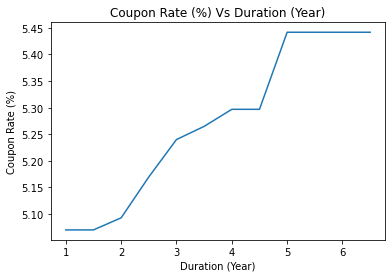

In [ ]:
Duration = list(df["Term"])[0:12]


plt.plot(Duration, result[0:12])
plt.title('Coupon Rate (%) Vs Duration (Year)')
plt.xlabel('Duration (Year)')
plt.ylabel('Coupon Rate (%)')
plt.show()




In [ ]:
print(Duration)
print(result)


[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
[5.0702114  5.0702114  5.09291512 5.16975302 5.24011547 5.26486301
 5.29692438 5.29692438 5.44179928 5.44179928 5.44179928 5.44179928
 5.44179928 5.44179928 5.44179928 5.44179928 5.44179928 5.44179928
 5.44179928 5.44179928 5.44179928 5.44179928 5.44179928]
